In [ ]:
# Part 2
# Darren Abedi-Boafo | Student Number: 33741357
# I worked and submitted alone
# The algorithms that i chose: KNN, Decision Tree, and Random Forest.

In [1]:
# Importation of the Necessary Libraries for my Chosen Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [2]:
# The load and exploration of the credit default datasets
cdtrain_data = pd.read_csv('creditdefault_train.csv')  
cdtest_data = pd.read_csv('creditdefault_test.csv')    

print(cdtrain_data.info())
print(cdtrain_data.describe())
print(cdtrain_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       15000 non-null  int64
 1   X1      15000 non-null  int64
 2   X2      15000 non-null  int64
 3   X3      15000 non-null  int64
 4   X4      15000 non-null  int64
 5   X5      15000 non-null  int64
 6   X6      15000 non-null  int64
 7   X7      15000 non-null  int64
 8   X8      15000 non-null  int64
 9   X9      15000 non-null  int64
 10  X10     15000 non-null  int64
 11  X11     15000 non-null  int64
 12  X12     15000 non-null  int64
 13  X13     15000 non-null  int64
 14  X14     15000 non-null  int64
 15  X15     15000 non-null  int64
 16  X16     15000 non-null  int64
 17  X17     15000 non-null  int64
 18  X18     15000 non-null  int64
 19  X19     15000 non-null  int64
 20  X20     15000 non-null  int64
 21  X21     15000 non-null  int64
 22  X22     15000 non-null  int64
 23  X23     150

In [3]:
# Preprocessing of the data
print(cdtrain_data.isnull().sum())
print(cdtest_data.isnull().sum())

train_x = cdtrain_data.drop('Y', axis=1)  
test_x = cdtest_data.drop('Y', axis=1)
train_y = cdtrain_data['Y']
test_y = cdtest_data['Y']

s = StandardScaler()
trainx_scaled = s.fit_transform(train_x)
testx_scaled = s.transform(test_x)

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64
Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64


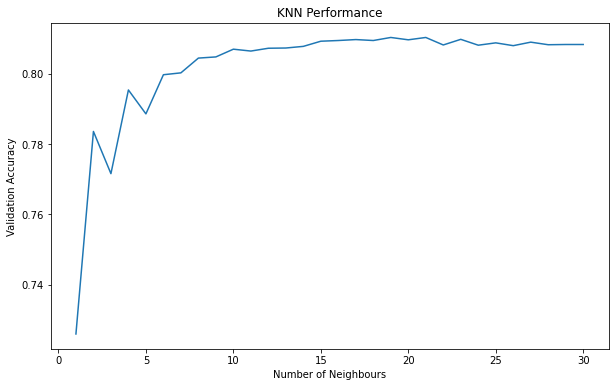

In [5]:
# Hyperparameter Tuning for K-Nearest Neighbours
range_fork = list(range(1, 31))  
knn_parameters = {'n_neighbors': range_fork }

gridsearchfor_knn = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv=10, scoring='accuracy')  
gridsearchfor_knn.fit(trainx_scaled, train_y)

knn_scores = gridsearchfor_knn.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(range_fork, knn_scores)
plt.xlabel('Number of Neighbours')
plt.ylabel('Validation Accuracy')
plt.title('KNN Performance')
plt.show()

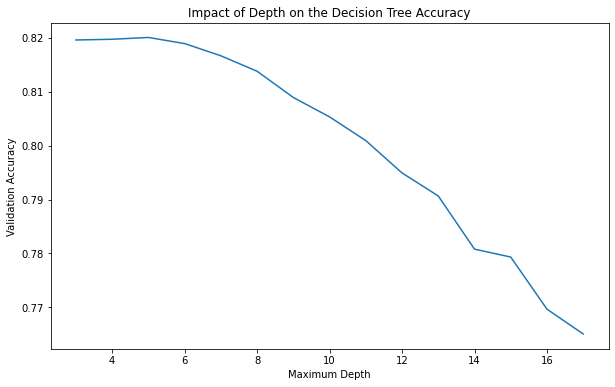

In [4]:
# Hyperparameter Tuning for Decision Trees
dt_parameters = {'max_depth': np.arange(3, 18)}  

gridsearchfor_dt = GridSearchCV(DecisionTreeClassifier(), dt_parameters, cv=10, scoring='accuracy')  
gridsearchfor_dt.fit(trainx_scaled, train_y)

tree_depths = np.arange(3, 18)
dt_scores = gridsearchfor_dt.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(tree_depths, dt_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Validation Accuracy')
plt.title('Impact of Depth on the Decision Tree Accuracy')
plt.show()

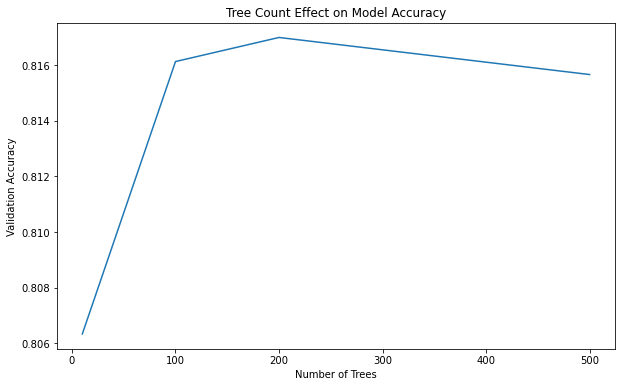

In [6]:
# Hyperparameter Tuning for Random Forests
rf_parameters = {'n_estimators': [10, 100, 200, 500]}  

gridsearchfor_rf = GridSearchCV(RandomForestClassifier(), rf_parameters, cv=10, scoring='accuracy')  
gridsearchfor_rf.fit(trainx_scaled, train_y)

countsof_trees = [10, 100, 200, 500]
rf_scores = gridsearchfor_rf.cv_results_['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(countsof_trees, rf_scores)
plt.xlabel('Number of Trees')
plt.ylabel('Validation Accuracy')
plt.title('Tree Count Effect on Model Accuracy')
plt.show()

In [7]:
# The print of the best score for each model based on accuracy
print("The Best Accuracy with K-Nearest Neighbours:", gridsearchfor_knn.best_score_)
print("The Best Accuracy with Decision Tree:", gridsearchfor_dt.best_score_)
print("The Best Accuracy with Random Forest:", gridsearchfor_rf.best_score_)

The Best Accuracy with K-Nearest Neighbours: 0.8103333333333333
The Best Accuracy with Decision Tree: 0.8200666666666668
The Best Accuracy with Random Forest: 0.817


In [ ]:
# The results show that the Decision Tree has the best score based on accuracy
# Therefore the best model selected is the Decision Tree

Decision Tree Performance on the Test Data:
Predicted Accuracy: 0.8170666666666667
Confusion Matrix:
 [[11189   493]
 [ 2251  1067]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     11682
           1       0.68      0.32      0.44      3318

    accuracy                           0.82     15000
   macro avg       0.76      0.64      0.66     15000
weighted avg       0.80      0.82      0.79     15000



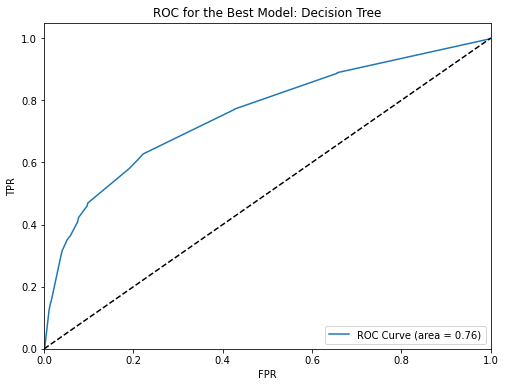

In [16]:
# Evaluation of the Decision Tree on the test dataset
optimal_model = gridsearchfor_dt.best_estimator_  
decision_tree = "Decision Tree" 

testpredicitions = optimal_model.predict(testx_scaled)  
testprobabilties = optimal_model.predict_proba(testx_scaled)[:, 1]  

print(f"{decision_tree} Performance on the Test Data:")  
print("Predicted Accuracy:", accuracy_score(test_y, testpredicitions))  
print("Confusion Matrix:\n", confusion_matrix(test_y, testpredicitions))  
print("Classification Report:\n", classification_report(test_y, testpredicitions))  

falsepos_rate, truepos_rate, r_thresholds = roc_curve(test_y, testprobabilties)  
plt.figure(figsize=(8, 6))
plt.plot(falsepos_rate, truepos_rate, label=f'ROC Curve (area = {roc_auc_score(test_y, testprobabilties):.2f})')  
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')  
plt.ylabel('TPR')  
plt.title('ROC for the Best Model: Decision Tree')  
plt.legend(loc="lower right")
plt.show()

In [17]:
# Computation of the Optimal Threshold for Decision Tree (Bonus)
optimal_index = np.argmax(truepos_rate - falsepos_rate)
optimal_t = r_thresholds[optimal_index]
print("Decision Tree’s Optimal Threshold for Classification:", optimal_t)

Decision Tree’s Optimal Threshold for Classification: 0.20994475138121546
